In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

In [42]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Campus Placement.csv')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Column Description

-   gender
-   ssc_p -> 10th class percentage
-   ssc_b -> 10th class board
-   hsc_p -> 12th class percentage
-   hsc_b -> 12th class board
-   hsc_s -> 12th class branch
-   degree_p -> undergraduate degree percentage
-   degree_t -> degree branch
-   workex -> work experience
-   etest_p -> Entrance test percentage
-   specialisation -> MBA branch
-   mba_p -> MBA percentage
-   status -> placement status
-   salary -> quoted salary

In [3]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  mba_t     215 non-null    object 
 11  mba_p     215 non-null    float64
 12  status    215 non-null    object 
 13  salary    148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


1. salary has null values

In [6]:
data.fillna(0,inplace=True)

Filling them with zeros, which is acceptable technically and avoid NaN's

In [7]:
data['salary'].isna().sum()

0

In [8]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
dataset = data[data['salary'] != 0]

e:\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

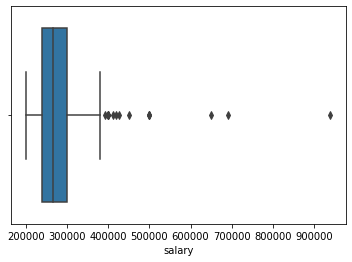

In [10]:
sns.boxplot(dataset.salary)

## Removing Outliers 

In [11]:
Manual_analysis = [42, 49, 120, 169, 206, 24, 134, 177, 197, 119, 150]
len(Manual_analysis)

11

In [12]:
def Outlier(dataset,feature):
    shape1 = dataset.shape[0]                                 #taking the shape before removing outliers to keep track of no of outliers
    lst = sorted(dataset[feature])                            #taking a list of sorted values of that column
    
    quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
    iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)
    
    #obtaining lower bound and upper bound
    lower_bound_val = quantile1 - (1.5 * iqr_value)
    upper_bound_val = quantile3 + (1.5 * iqr_value)
    
    dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
    dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value
    
    return shape1-(dataset.shape[0])

In [13]:
outlier_free_data = dataset.copy()
print(outlier_free_data.shape)
for feature in ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']:
    shape1 = Outlier(outlier_free_data,feature)
    print('\n {} has {} outliers'.format(feature, shape1))
outlier_free_data.shape

(148, 14)

 ssc_p has 0 outliers

 hsc_p has 2 outliers

 degree_p has 4 outliers

 etest_p has 0 outliers

 mba_p has 0 outliers

 salary has 13 outliers


C:\Users\USER\AppData\Local\Temp/ipykernel_13608/3958331934.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
C:\Users\USER\AppData\Local\Temp/ipykernel_13608/3958331934.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value


(129, 14)

Comparing the manual index count, we've a difference of only one (i.e..index no: 150)     

So, as for now, we can proceed with above results itself

### Reindexing

In [14]:
outlier_free_data.reset_index(drop=True, inplace = True)
outlier_free_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
4,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,M,83.33,Central,78.00,Others,Commerce,61.00,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed,300000.0
125,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,216000.0
126,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0
127,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,Placed,295000.0


### Normalising etest_p and salary

Seeing the univariate analysis, the attribute ```etest_p``` and ```salary```has deviated from the norms of normal distribution. So, we normalise them using log transformations.

In [15]:
outlier_free_data['etest_p'] = np.log(outlier_free_data['etest_p'])
outlier_free_data['salary'] = np.log(outlier_free_data['salary'])

### Creating Dummies

In [16]:
data_copy = outlier_free_data.copy()

cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_copy[var], prefix=var)
    data1=data_copy.join(cat_list)
    data_copy = data1
    
cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
data_vars=data_copy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [17]:
out_free_encoded_data=data_copy[to_keep]
out_free_encoded_salary = out_free_encoded_data['salary']
out_free_encoded_data.drop(['status', 'salary'], axis = 1, inplace = True)
out_free_encoded_data

e:\virtualenv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR
0,67.00,91.00,58.00,4.007333,58.80,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,4.460144,66.28,0,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,4.317488,57.80,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,82.00,64.00,66.00,4.204693,62.14,0,1,1,0,1,...,0,0,1,0,0,1,0,1,1,0
4,73.00,79.00,72.00,4.514589,61.29,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,83.33,78.00,61.00,4.483680,71.55,0,1,1,0,0,...,0,1,0,1,0,0,0,1,1,0
125,62.00,72.00,65.00,4.204693,56.49,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
126,58.00,60.00,72.00,4.304065,53.62,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
127,67.00,67.00,73.00,4.077537,69.72,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0


In [18]:
out_free_encoded_salary

0      12.506177
1      12.206073
2      12.429216
3      12.437184
4      12.350173
         ...    
124    12.611538
125    12.283034
126    12.524526
127    12.594731
128    12.225875
Name: salary, Length: 129, dtype: float64

## Feature Selection

-  [etest_p, mba_p, ssc_p, hsc_p, degree_p]
- [workex, mba_t, gender]         
More p-value - ['degree_t', 'hsc_s', 'ssc_b', 'hsc_b']

In [19]:
out_free_sel_encod_data = out_free_encoded_data[['etest_p', 'mba_p', 'ssc_p', 'hsc_p', 'workex_Yes', 'workex_No', 'mba_t_Mkt&Fin', 'mba_t_Mkt&HR', 'gender_M', 'gender_F']]
out_free_sel_encod_data

,etest_p,mba_p,ssc_p,hsc_p,workex_Yes,workex_No,mba_t_Mkt&Fin,mba_t_Mkt&HR,gender_M,gender_F
0,4.007333,58.80,67.00,91.00,0,1,0,1,1,0
1,4.460144,66.28,79.33,78.33,1,0,1,0,1,0
2,4.317488,57.80,65.00,68.00,0,1,1,0,1,0
3,4.204693,62.14,82.00,64.00,1,0,1,0,1,0
4,4.514589,61.29,73.00,79.00,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
124,4.483680,71.55,83.33,78.00,1,0,1,0,1,0
125,4.204693,56.49,62.00,72.00,0,1,1,0,1,0
126,4.304065,53.62,58.00,60.00,0,1,1,0,1,0
127,4.077537,69.72,67.00,67.00,1,0,1,0,1,0


## Train_Test_Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(out_free_sel_encod_data, out_free_encoded_salary, test_size=0.20, random_state=42)

## Baseline Models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.023516 (0.008145)
ScaledLASSO: -0.023116 (0.007611)
ScaledEN: -0.023116 (0.007611)
ScaledKNN: -0.025536 (0.009813)
ScaledCART: -0.048277 (0.015310)
ScaledGBM: -0.029195 (0.007486)


Here, Both Lasso and ElasticNet has the same error results. But, considering the the fact below,      
*In general, Elastic Net is preferred over Lasso
since Lasso may behave erratically when the number of features is greater than
the number of training instances or when several features are strongly correlated.*

We will proceed with elasticNet model from here on.

### GridSearchCV to find the best Parameters

In [41]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)   # Applying standard Scalar
rescaledX = scaler.transform(X_train)  

param_grid = dict()
param_grid['max_iter'] = [1, 3, 4, 5]
param_grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
param_grid['l1_ratio'] = np.arange(0, 1, 0.01)

model = ElasticNet(random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.023389 (0.007449) with: {'alpha': 1e-05, 'l1_ratio': 0.0, 'max_iter': 1}
-0.023579 (0.008076) with: {'alpha': 1e-05, 'l1_ratio': 0.0, 'max_iter': 3}
-0.023582 (0.008131) with: {'alpha': 1e-05, 'l1_ratio': 0.0, 'max_iter': 4}
-0.023583 (0.008137) with: {'alpha': 1e-05, 'l1_ratio': 0.0, 'max_iter': 5}
-0.023389 (0.007449) with: {'alpha': 1e-05, 'l1_ratio': 0.01, 'max_iter': 1}
-0.023579 (0.008076) with: {'alpha': 1e-05, 'l1_ratio': 0.01, 'max_iter': 3}
-0.023582 (0.008131) with: {'alpha': 1e-05, 'l1_ratio': 0.01, 'max_iter': 4}
-0.023583 (0.008137) with: {'alpha': 1e-05, 'l1_ratio': 0.01, 'max_iter': 5}
-0.023389 (0.007449) with: {'alpha': 1e-05, 'l1_ratio': 0.02, 'max_iter': 1}
-0.023579 (0.008076) with: {'alpha': 1e-05, 'l1_ratio': 0.02, 'max_iter': 3}
-0.023582 (0.008131) with: {'alpha': 1e-05, 'l1_ratio': 0.02, 'max_iter': 4}
-0.023583 (0.008137) with: {'alpha': 1e-05, 'l1_ratio': 0.02, 'max_iter': 5}
-0.023389 (0.007449) with: {'alpha': 1e-05, 'l1_ratio': 0.03, 'max_iter': 1}
-0.

-0.023389 (0.007449) with: {'alpha': 0.0, 'l1_ratio': 0.78, 'max_iter': 1}
-0.023579 (0.008076) with: {'alpha': 0.0, 'l1_ratio': 0.78, 'max_iter': 3}
-0.023582 (0.008131) with: {'alpha': 0.0, 'l1_ratio': 0.78, 'max_iter': 4}
-0.023583 (0.008137) with: {'alpha': 0.0, 'l1_ratio': 0.78, 'max_iter': 5}
-0.023389 (0.007449) with: {'alpha': 0.0, 'l1_ratio': 0.79, 'max_iter': 1}
-0.023579 (0.008076) with: {'alpha': 0.0, 'l1_ratio': 0.79, 'max_iter': 3}
-0.023582 (0.008131) with: {'alpha': 0.0, 'l1_ratio': 0.79, 'max_iter': 4}
-0.023583 (0.008137) with: {'alpha': 0.0, 'l1_ratio': 0.79, 'max_iter': 5}
-0.023389 (0.007449) with: {'alpha': 0.0, 'l1_ratio': 0.8, 'max_iter': 1}
-0.023579 (0.008076) with: {'alpha': 0.0, 'l1_ratio': 0.8, 'max_iter': 3}
-0.023582 (0.008131) with: {'alpha': 0.0, 'l1_ratio': 0.8, 'max_iter': 4}
-0.023583 (0.008137) with: {'alpha': 0.0, 'l1_ratio': 0.8, 'max_iter': 5}
-0.023389 (0.007449) with: {'alpha': 0.0, 'l1_ratio': 0.81, 'max_iter': 1}
-0.023579 (0.008076) with: {'

The best parameters after grid search,     
Best: -0.022171 using {'alpha': 0.1, 'l1_ratio': 0.08, 'max_iter': 1}

## Finalise and Validate Model

In [43]:
from sklearn.metrics import mean_squared_error

# Standard scalar
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

model = ElasticNet(random_state=21, alpha = 0.1, max_iter = 1, l1_ratio = 0.08)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

0.018828245546451298


## Residuals

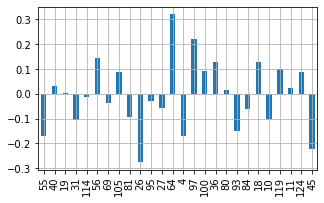

In [44]:
residual = y_test - predictions
residual.plot(kind = 'bar', figsize = (5,3))
plt.grid()

### Checking the normality of the residuals

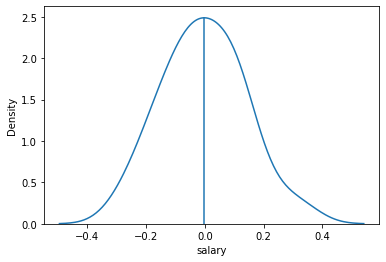

In [46]:
sns.distplot(residual,hist = False)
plt.vlines(np.mean(residual),0,2.5)

In [47]:
np.mean(residual), np.median(residual)

(-0.003988505971464111, -0.004527217664946015)

In [49]:
skew(residual), kurtosis(residual)

(0.17457494568009388, -0.24206334107037408)

skew value - range(-1 to 1)     
- Here, it has almost 0(0.17) skewedness    

kurtosis has range of any values. Usually, -3 to 3 is considered to be optimal.    
- -0.24 is almost equal to 0 

With above results, As the residual distribution is in normal and the Parameters are within the limits
> This model is considered to be the most optimal model